In [1]:
library(tidyverse)
theme_set(theme_dark())
orig_theme <- theme_update(plot.background = element_rect(fill="darkgrey"),
panel.background = element_rect(fill="darkgrey"),
legend.background = element_rect(fill="darkgrey"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



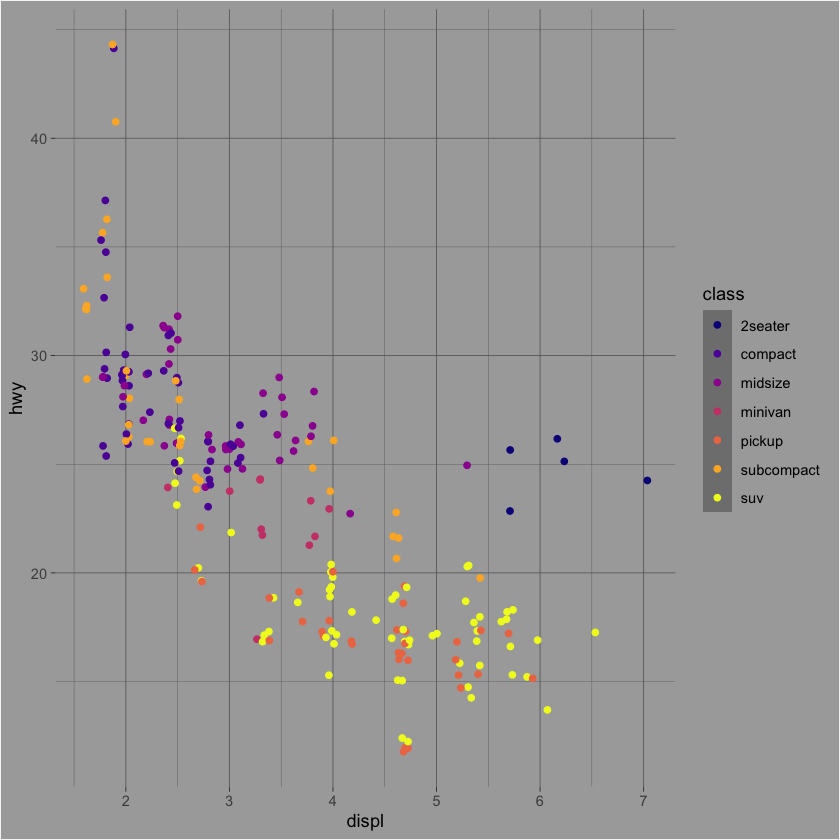

In [11]:
ggplot(mpg) + geom_point(aes(displ,hwy,color=class), position="jitter") + 
scale_color_viridis_d(option="plasma")

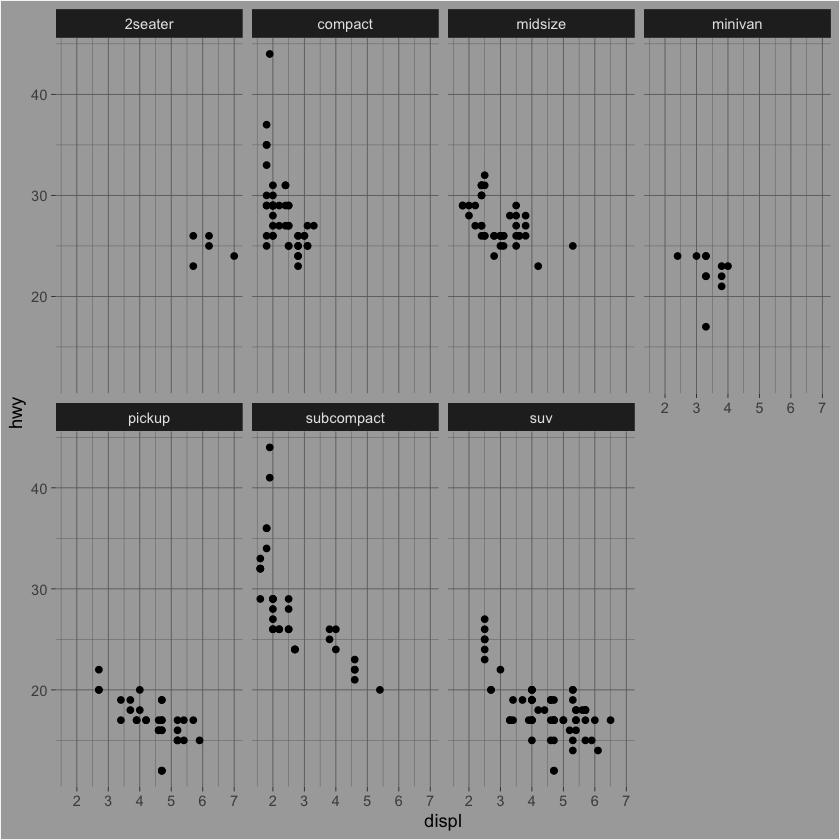

In [41]:
ggplot(mpg) + geom_point(aes(displ,hwy)) + facet_wrap(~class, nrow=2)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



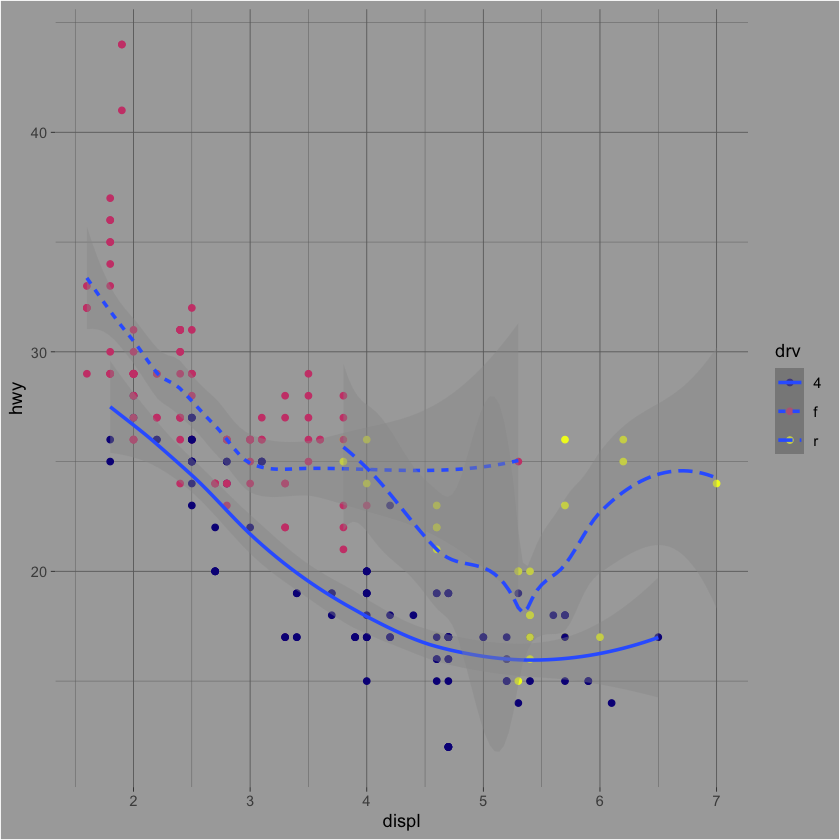

In [61]:
ggplot(mpg, aes(displ,hwy)) + 
geom_point(aes(color=drv)) +
geom_smooth(aes(linetype=drv)) +
scale_color_viridis_d(option="plasma")

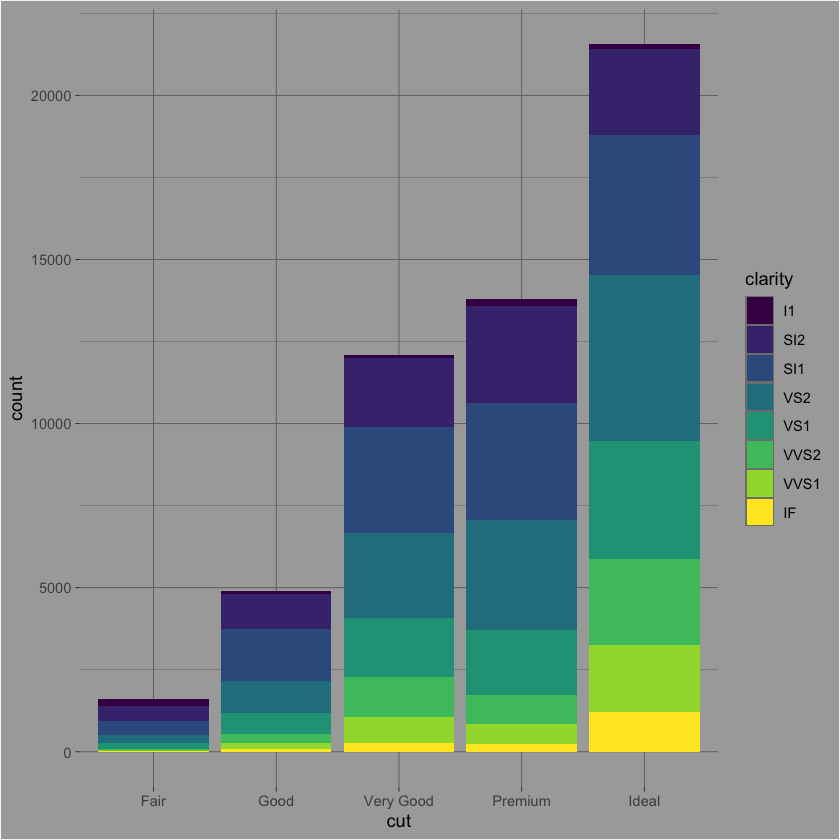

In [43]:
bar <- ggplot(diamonds) + geom_bar(aes(x=cut,fill=clarity))

bar

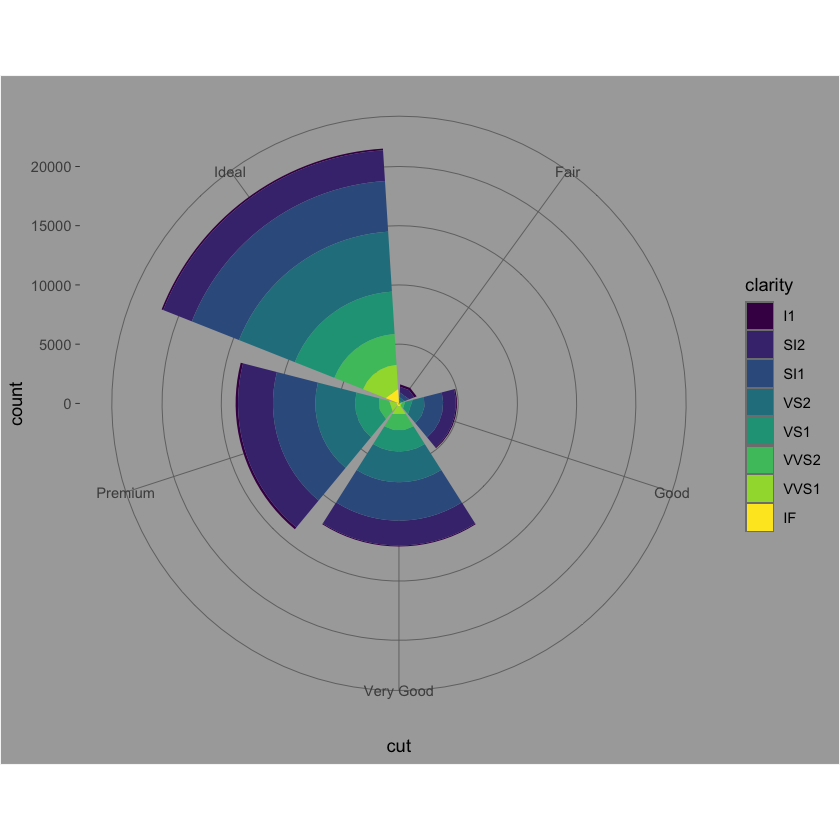

In [45]:
bar + coord_polar()

dplyr

In [44]:
starwars %>%
filter(skin_color %in% c("red","blue")) %>%
arrange(height) %>%
select(-(films:starships)) %>%
mutate(density = 10000*mass/(height^3))

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,density
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
Darth Maul,175,80,none,red,yellow,54,male,masculine,Dathomir,Zabrak,0.14927114
Ayla Secura,178,55,none,blue,hazel,48,female,feminine,Ryloth,Twi'lek,0.09752202
Mas Amedda,196,NA,none,blue,blue,NA,male,masculine,Champala,Chagrian,NA


In [50]:
starwars %>%
group_by(sex, gender) %>% 
summarize(mheight = median(height, na.rm=TRUE), n=n())

`summarise()` has grouped output by 'sex'. You can override using the `.groups`
argument.


sex,gender,mheight,n
<chr>,<chr>,<dbl>,<int>
female,feminine,166,16
hermaphroditic,masculine,175,1
male,masculine,183,60
none,feminine,96,1
none,masculine,132,5
NA,NA,183,4


In [53]:
starwars %>%
group_by(sex, skin_color) %>% 
filter(n()> 1) %>% 
summarize(mheight = median(height, na.rm=TRUE), n=n())

`summarise()` has grouped output by 'sex'. You can override using the `.groups`
argument.


sex,skin_color,mheight,n
<chr>,<chr>,<dbl>,<int>
female,fair,163.0,3
female,light,165.0,6
female,yellow,168.0,2
male,"blue, grey",115.5,2
male,brown,184.5,4
male,dark,185.0,4
male,fair,181.0,13
male,green,186.5,6
male,grey,206.0,5


In [56]:
starwars %>% 
group_by(species) %>%
mutate(mprop = mass/sum(mass,na.rm=TRUE), n = n()) %>% 
select(name,species,mass,mprop,n)

name,species,mass,mprop,n
<chr>,<chr>,<dbl>,<dbl>,<int>
Luke Skywalker,Human,77.0,0.04227982,35
C-3PO,Droid,75.0,0.26881720,6
R2-D2,Droid,32.0,0.11469534,6
Darth Vader,Human,136.0,0.07467604,35
Leia Organa,Human,49.0,0.02690534,35
Owen Lars,Human,120.0,0.06589062,35
Beru Whitesun lars,Human,75.0,0.04118164,35
R5-D4,Droid,32.0,0.11469534,6
Biggs Darklighter,Human,84.0,0.04612344,35


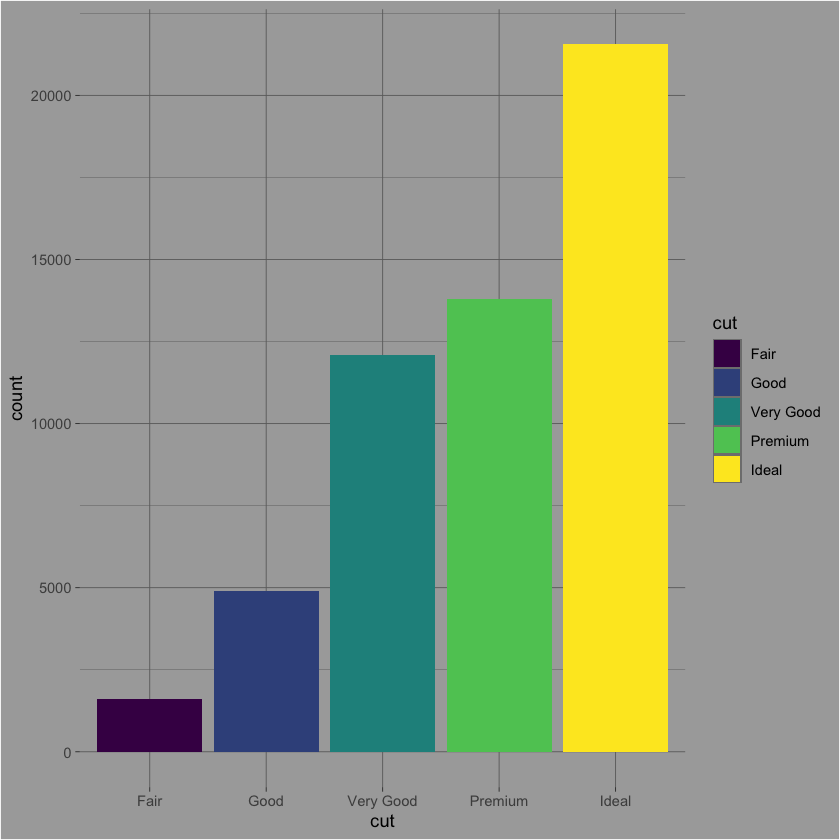

In [97]:
ggplot(diamonds) + geom_bar(aes(x=cut,fill=cut))

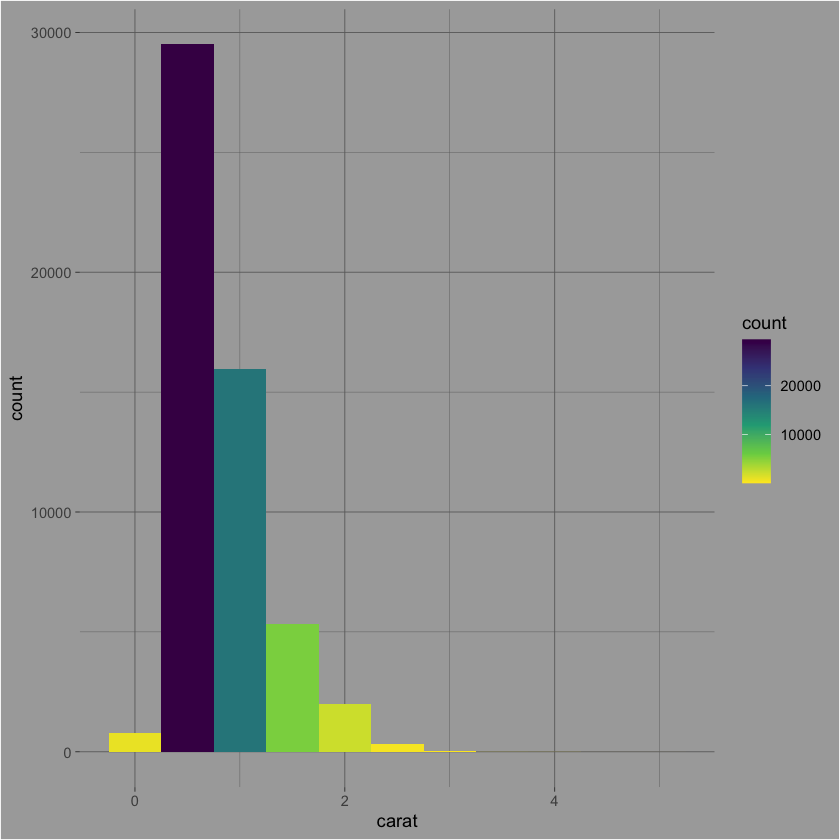

In [115]:
ggplot(diamonds) + geom_histogram(aes(x=carat,fill=..count..), binwidth = 0.5) +
scale_fill_viridis_c(direction=-1)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



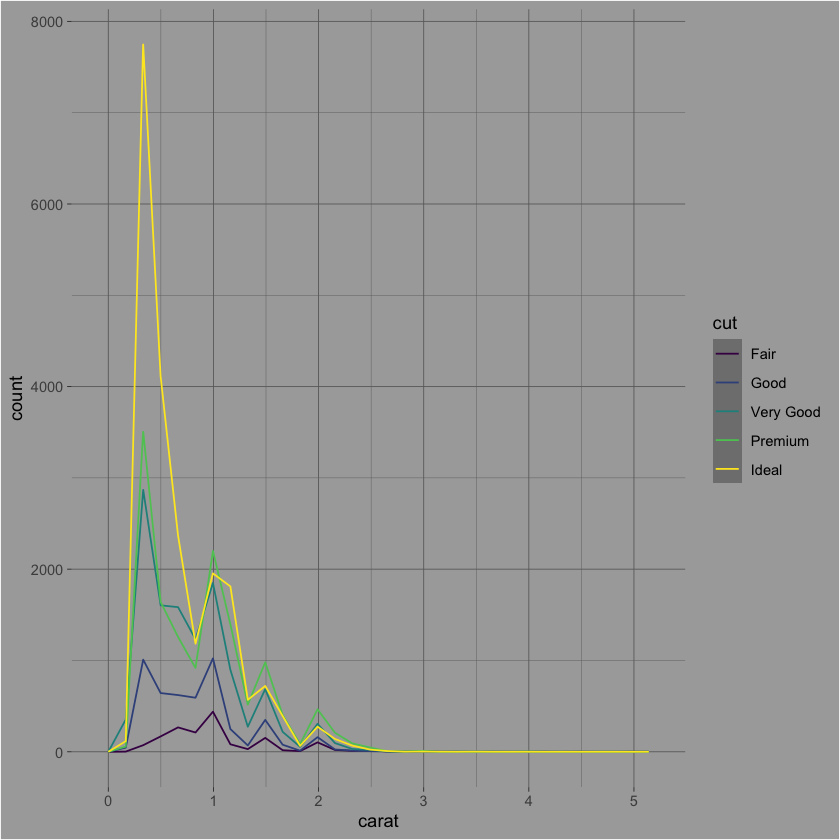

In [48]:
ggplot(diamonds) + geom_freqpoly(aes(x=carat,color=cut))

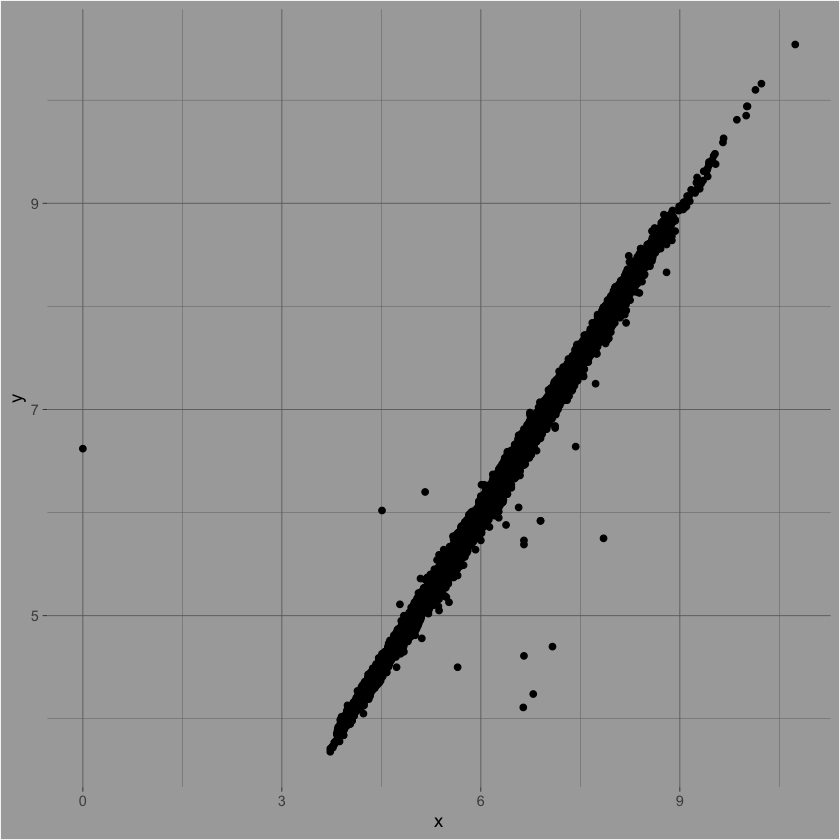

In [65]:
diamonds %>%
mutate(y = ifelse(y < 3 | y > 20, NA, y)) %>%
ggplot() + geom_point(aes(x,y), na.rm = TRUE)

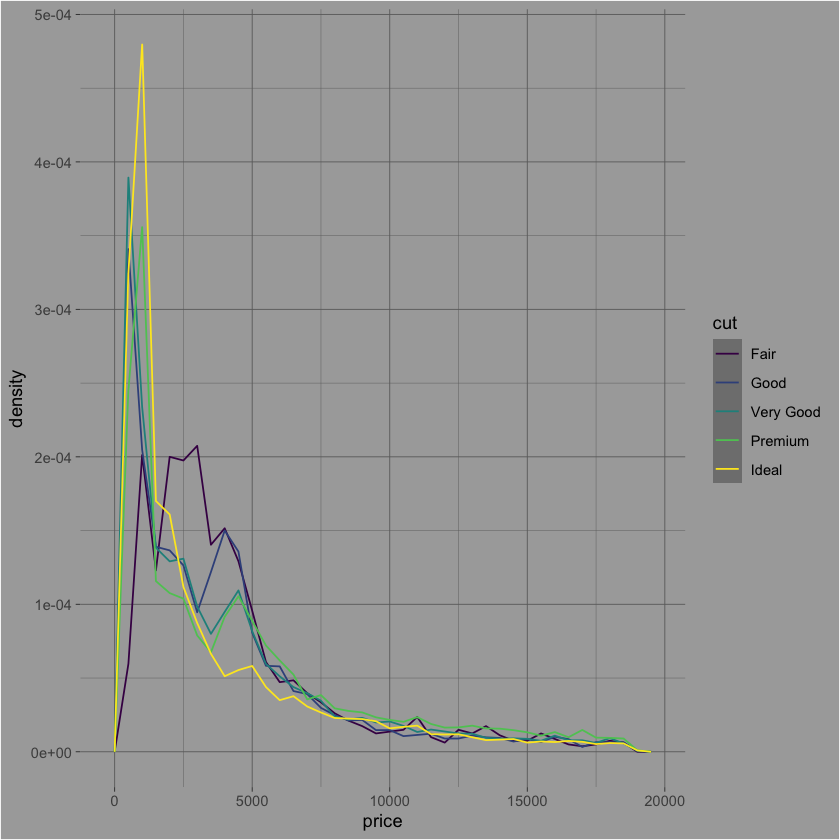

In [74]:
ggplot(diamonds) + 
geom_freqpoly(aes(x=price, y=..density.., color=cut), binwidth=500) 

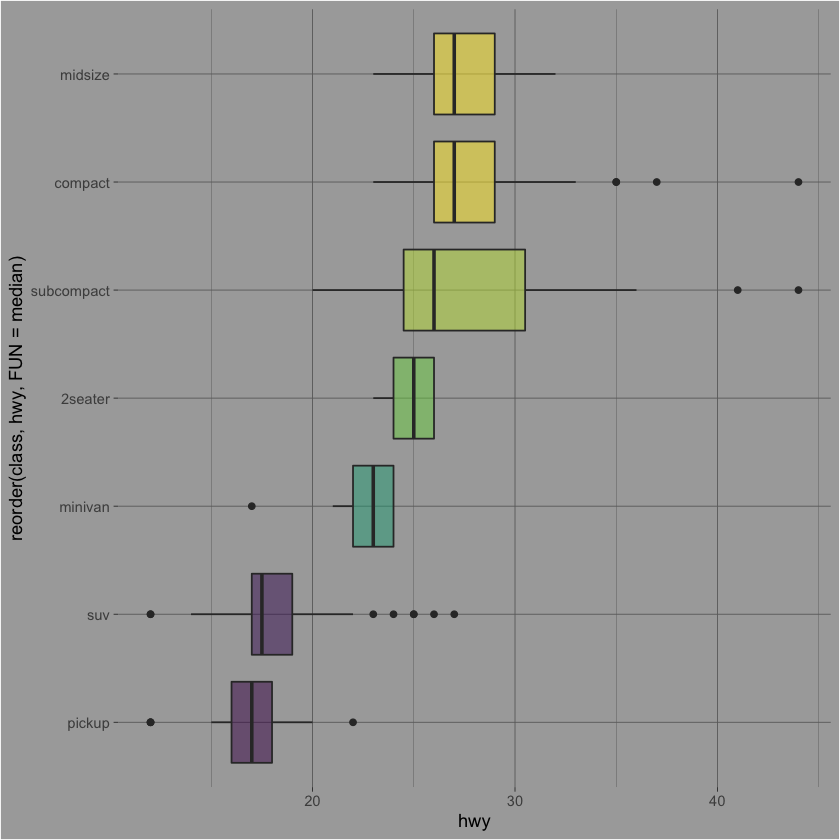

In [160]:
mpg %>%
group_by(class) %>% mutate(hwymed = median(hwy)) %>%
ggplot() +
geom_boxplot(aes(x=reorder(class,hwy,FUN=median), y=hwy, fill=hwymed),
show.legend=FALSE) + 
coord_flip() +
scale_fill_viridis_c(alpha=0.5)


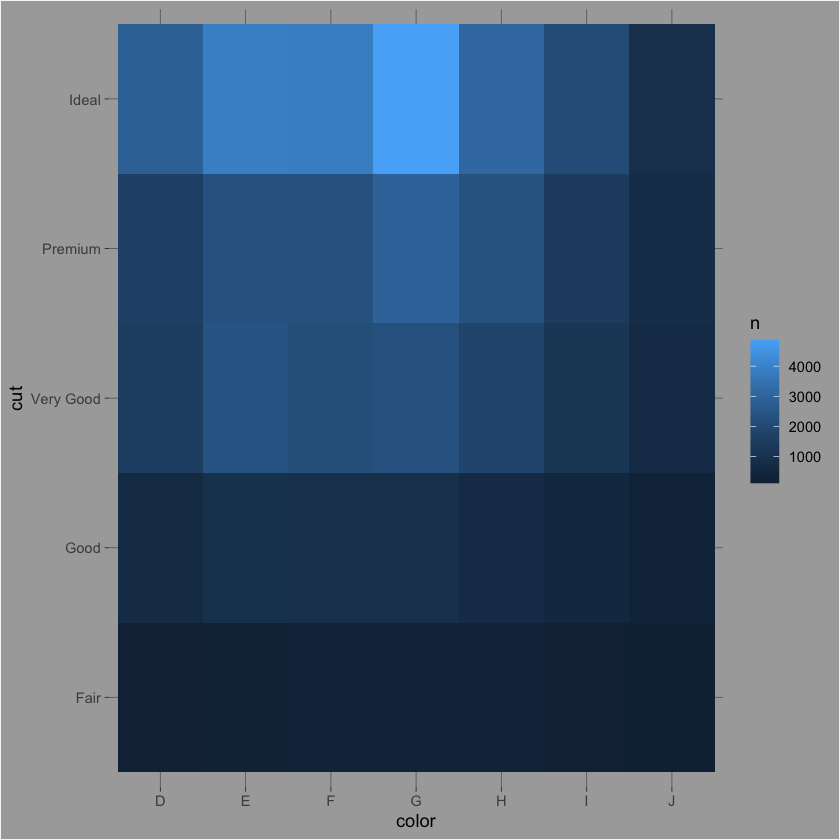

In [2]:
diamonds %>% count(color,cut) %>%  ##count makes a column named "n"
ggplot() + geom_tile(aes(color,cut,fill=n))

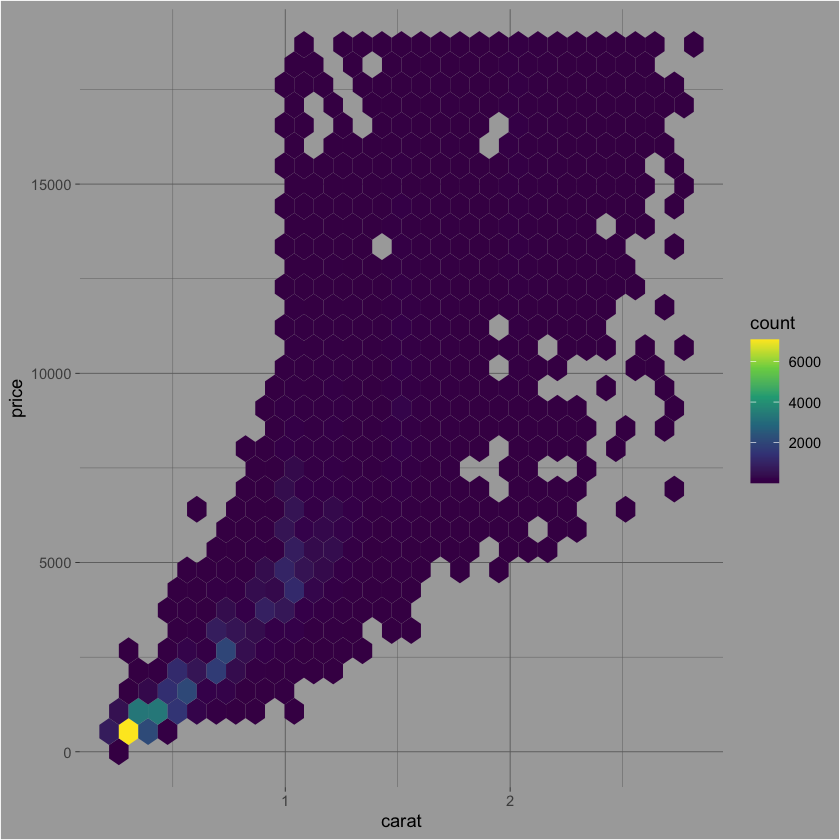

In [8]:
diamonds %>% filter(carat < 3) %>%
ggplot() + geom_hex(aes(carat,price)) + scale_fill_viridis_c()


Residuals

In [12]:
library(modelr)

In [13]:
m1pc <- lm(log(price) ~ log(carat), data=diamonds)

d2 <- diamonds %>%
add_residuals(m1pc) %>% ##makes a column called resid
mutate(resid = exp(resid))##model is on a log scale

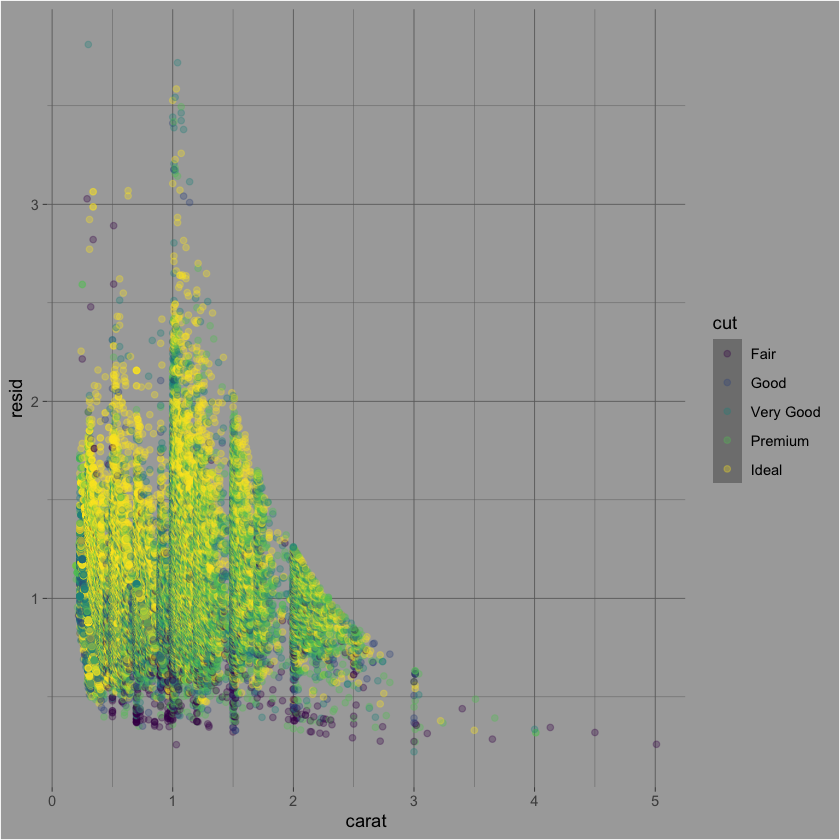

In [25]:
ggplot(d2) + geom_point(aes(carat,resid,color=cut),alpha=0.3)

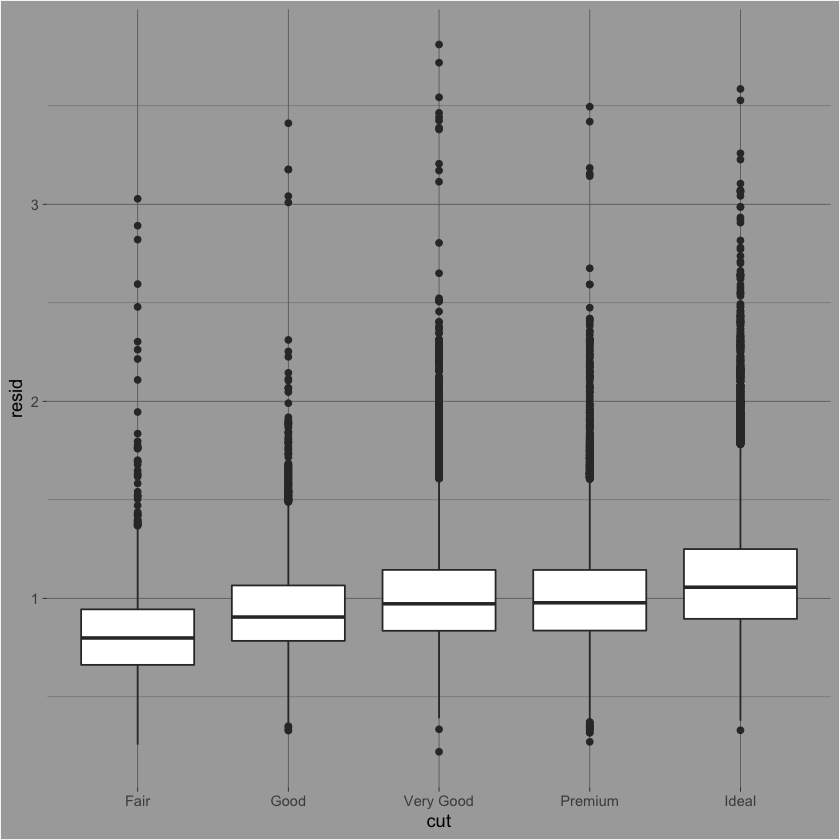

In [16]:
ggplot(d2) + 
geom_boxplot(aes(cut,resid))

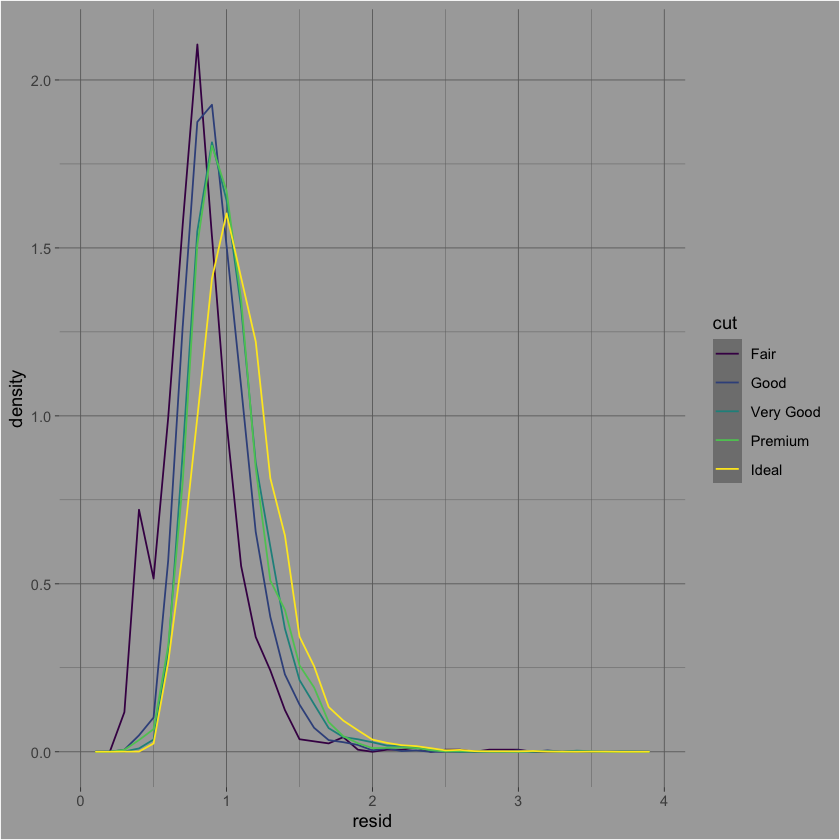

In [33]:
ggplot(d2) + 
geom_freqpoly(aes(x=resid, y=..density.., color=cut), binwidth=0.1) 

Mastering Shiny ch. 4

In [2]:
library(vroom)

In [7]:
injuries <- vroom("injuries.tsv.gz");
products <- vroom("products.tsv");
population <- vroom("population.tsv");

Rows: 255064 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (6): sex, race, body_part, diag, location, narrative
dbl  (3): age, prod_code, weight
date (1): trmt_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 38 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): title
dbl (1): prod_code

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 170 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): sex
dbl (2): age, population

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this mess

In [21]:
head(injuries)

trmt_date,age,sex,race,body_part,diag,location,prod_code,weight,narrative
<date>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
2017-01-01,71,male,white,Upper Trunk,Contusion Or Abrasion,Other Public Property,1807,77.6641,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION
2017-01-01,16,male,white,Lower Arm,"Burns, Thermal",Home,676,77.6641,"16YOM TRIPPED OVER A RUG AND FELL INTO A BURNING FIREPLACEDX BURNS INVOLVING LESS THAN 10% OF BODY SURFACE, FOREARM"
2017-01-01,58,male,white,Upper Trunk,Contusion Or Abrasion,Home,649,77.6641,"58 YOM WENT TO BATHROOM; LOST HIS BALANCE, FELL TO FLOOR HIT UPPER BACK ON TOILET. CONTUSION OF UPPER BACK."
2017-01-01,21,male,white,Lower Trunk,"Strain, Sprain",Home,4076,77.6641,"21 YOM TURNED WRONG AS HE GOT OUT OF BED. TWISTED LOWER BACK. STRAIN, LOWER BACK. (ACUTE EXACERBATION OF LOW BACK DISORDER)"
2017-01-01,54,male,white,Head,Inter Organ Injury,Other Public Property,1807,77.6641,54 YOM WAS FOUND ON FLOOR OF NURSING HOME WHERE HE RESIDES; HAD FALLEN TO THE FLOOR. SUBDURAL HEMATOMA.
2017-01-01,21,male,white,Hand,Fracture,Home,1884,77.6641,"21 YOM HIT WALL IN ANGER; HAD RESULTANT PAIN OF RT. HAND. .FX, RT. HAND"


In [11]:
prod649 <- filter(injuries, prod_code==649)
nrow(prod649)

[1] 2993

In [15]:
count(prod649,location,wt=weight,sort=TRUE)

location,n
<chr>,<dbl>
Home,99603.1282
Other Public Property,18662.8753
Unknown,16267.4425
School,658.9078
Street Or Highway,16.1828
Sports Or Recreation Place,14.7756


In [17]:
p649agesex <- count(prod649, age, sex, wt=weight)
head(p649agesex)

age,sex,n
<dbl>,<chr>,<dbl>
0,female,4.7570
0,male,14.2710
1,female,253.3526
1,male,231.4887
2,female,438.1403
2,male,631.8107


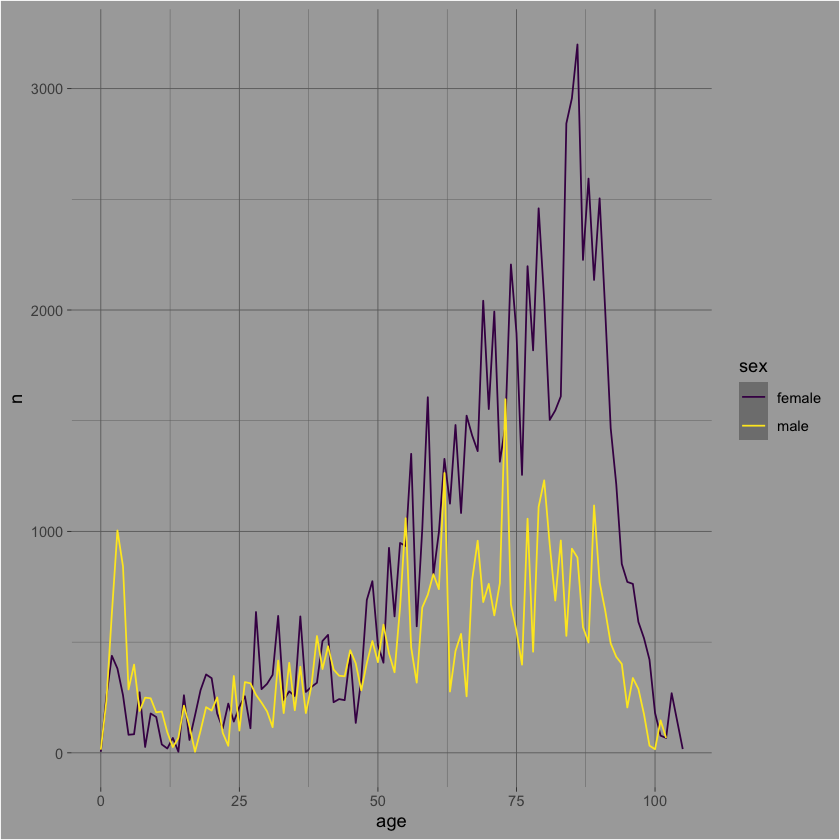

In [19]:
ggplot(p649agesex) + geom_line(aes(age,n,color=sex)) + scale_color_viridis_d()

rate by population

In [22]:
p649agesex <- p649agesex %>% 
left_join(population, by = c("age", "sex")) %>%
mutate(rate = n/population)
head(p649agesex)

age,sex,n,population,rate
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
0,female,4.7570,1924145,2.472267e-06
0,male,14.2710,2015150,7.081855e-06
1,female,253.3526,1943534,1.303567e-04
1,male,231.4887,2031718,1.139374e-04
2,female,438.1403,1965150,2.229551e-04
2,male,631.8107,2056625,3.072075e-04


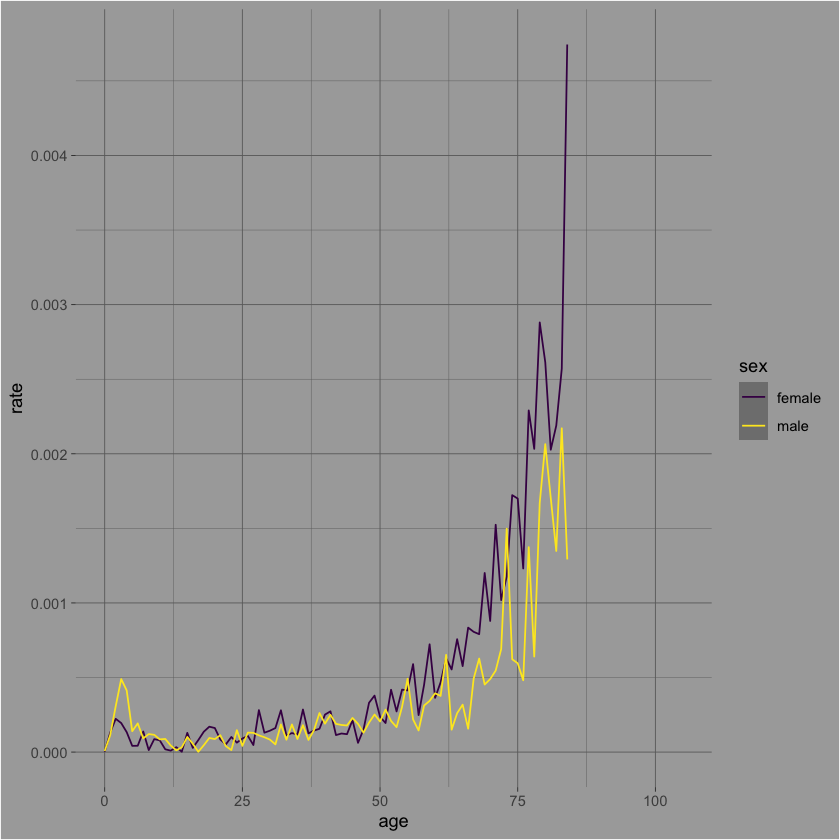

In [23]:
ggplot(p649agesex) + geom_line(aes(age,rate,color=sex),na.rm=TRUE) + scale_color_viridis_d()